# Graded Assignment 4
## SQL and Exploratory Data Analysis

The following learn-by-building exercise will guide you through the process of building out a simple analysis along with some accompanying charts. This module is considerably more difficult than similar exercise blocks in the past, but it sure is a lot more rewarding!

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("data_input/chinook.db")

![](assets/chinookschema2.png)

Let's try by first constructing a DataFrame using the `read_sql_query()` method that we've grown familiar to. We want to develop a simple sales visualization report of our top 5 key markets (`Country` column in `customers`) ranked by Sales (`Total` column in `invoices`). 

We also want to identify our top 5 customers by name (`FirstName`, `LastName`) in the report.

Last but not least, we want the report to include a day-of-week analysis on sales performance, and for that we will need the `InvoiceDate` column. 

> **Hint 1**: `pandas` has built-in methods of extracting the name of day in a week. We've seen this in Part 2 of this specialization (**Working with Datetime chapter**). An example usage is:
>
> `data['InvoiceDOW'] = data['InvoiceDate'].dt.day_name()`
>
>  **Hint 2**: In `read_sql_query`, you can use the `parse_dates='InvoiceDate'` argument to have the specified column parsed as date, saving you from a `to_datetime()` conversion

In [92]:
## Your code here
cust = pd.read_sql_query("SELECT Country as Country,FirstName, LastName, InvoiceDate, i.Total FROM customers as C\
                          LEFT JOIN invoices as I on C.CustomerId = I.CustomerId\
                          order by Total DESC\
                          " ,conn)
cust.shape[0]


412

In [93]:
## Your code here
cust['InvoiceDate'] = pd.to_datetime(cust['InvoiceDate'])
cust['InvoiceDOW'] = cust['InvoiceDate'].dt.day_name()


In [94]:
## Your code here
cust.dtypes

Country                object
FirstName              object
LastName               object
InvoiceDate    datetime64[ns]
Total                 float64
InvoiceDOW             object
dtype: object

1. Which of the following customers are among the top 5 customers ranked by their respective total (`Total`)?
    - [ ] Victor Stevens
    - [x] Hugh O'Reilly
    - [ ] Puja Srivastava
    - [ ] Astrid Gruber	

In [95]:
## Your code here
## Jawaban no 1
cust3 = pd.read_sql_query("SELECT country,FirstName, LastName, sum (i.Total) as Total FROM customers as C\
                          LEFT JOIN invoices as I on C.CustomerId = I.CustomerId\
                        group by country,FirstName, LastName order by Total DESC\
                         limit 5" ,conn)
cust3.head()

## Hugh O'Reilly

,Country,FirstName,LastName,Total
0,Czech Republic,Helena,Holý,49.62
1,USA,Richard,Cunningham,47.62
2,Chile,Luis,Rojas,46.62
3,Hungary,Ladislav,Kovács,45.62
4,Ireland,Hugh,O'Reilly,45.62


2. Which of the following countries are among the top 5 grossing ranked by their respective total (`Total`)?
    - [ ] United Kingdom
    - [x] Germany
    - [ ] Portugal
    - [ ] India

In [96]:
## Your code here
cust2 = pd.read_sql_query("SELECT country, sum (i.Total) as Total FROM customers as C\
                          LEFT JOIN invoices as I on C.CustomerId = I.CustomerId\
                        group by Country order by Total DESC\
                         limit 5" ,conn)
cust2

# Germany

,Country,Total
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48


Use the code block below as reference to create a DataFrame containing records where the customers are from one of the top 5 countries. Notice that we have additionally converted our day-of-week column into a `Categorical` column:

```
top5 = ______.groupby('Country').Total.sum().sort_values(ascending=False).head().index.to_list()

top5_data = ______[______['Country'].isin(top5)].copy()

dayorder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
top5_data['InvoiceDOW'] = pd.Categorical(top5_data['InvoiceDOW'],
                                         categories=dayorder,
                                         ordered=True)
top5_data
```

In [97]:
## Your code here
top5 = cust.groupby('Country').Total.sum().sort_values(ascending=False).head().index.to_list()
top5_data = cust[cust['Country'].isin(top5)].copy()
dayorder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
top5_data['InvoiceDOW'] = pd.Categorical(top5_data['InvoiceDOW'],
                                         categories=dayorder,
                                         ordered=True)
top5_data

,Country,FirstName,LastName,InvoiceDate,Total,InvoiceDOW
1,USA,Richard,Cunningham,2012-08-05,23.86,Sunday
5,USA,Victor,Stevens,2011-05-29,18.86,Sunday
8,France,Isabelle,Mercier,2012-10-06,16.86,Saturday
10,USA,Frank,Ralston,2010-03-21,15.86,Sunday
11,Germany,Fynn,Zimmermann,2011-04-23,14.91,Saturday
...,...,...,...,...,...,...
393,Germany,Niklas,Schröder,2010-03-29,0.99,Monday
394,France,Dominique,Lefebvre,2012-08-13,0.99,Monday
395,France,Marc,Dubois,2013-10-21,0.99,Monday
396,France,Wyatt,Girard,2009-12-26,0.99,Saturday


3. How many sales transactions (or records, or rows) were from the top 5 countries?
    - [ ] 7
    - [X] 245
    - [ ] 412
    - [ ] 1715

In [56]:
## Jawaban no.3
top5_data.shape[0]
## 245

245

4. Using the `pd.pivot_table()` method, answer the next two questions: How much sales (`Total`) did we make in total (`sum`) from the France market on a Tuesday? How much sales did we make in total from all the top 5 markets combined on a Friday?
    - [ ] 160.41 / 173.31  
    - [ ] 160.41 / 326.77
    - [ ] 1.98 / 173.31
    - [x] 1.98 / 326.77

In [69]:
## Your code here
cust_france=cust[cust['Country'] == 'France']

pd.pivot_table(
    data=cust_france,
    index= 'Country',
    columns= 'InvoiceDOW',
    values= 'Total',
    aggfunc= 'sum'
)

#1.98

InvoiceDOW,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Country,,,,,,,
France,1.98,25.75,87.15,18.84,47.52,1.98,11.88


In [118]:
## Jawaban no.4
cust_friday = cust[cust['InvoiceDOW'] == 'Friday']

pd.pivot_table(
    data=cust_friday,
    index= 'InvoiceDOW',
    values= 'Total',
    aggfunc= 'sum'
)
#326.77
#1.98 / 326.77

,Total
InvoiceDOW,
Friday,326.77


In [120]:
custt = pd.pivot_table(
    data=cust,
    index= 'InvoiceDOW',
    values= 'Total',
    aggfunc= 'sum'
)

custt


,Total
InvoiceDOW,
Friday,326.77
Monday,326.82
Saturday,329.76
Sunday,341.77
Thursday,332.89
Tuesday,321.81
Wednesday,348.78


5. Give the `pivot_table` that you created a name. Remove the margins if they were included in the earlier step. Create a visualization by chaining the `.plot()` method on the pivot table. Set the `kind` parameter to be one of: `line`, `bar`, `scatter` & `box`. Which one is the **LEAST** appropriate plot type(s)?
    - [ ] `line`
    - [ ] `bar`
    - [x] `scatter`
    - [ ] `box`

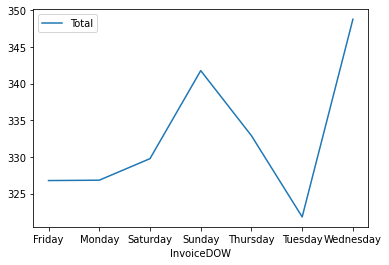

In [122]:
## Your code here
custt.plot()

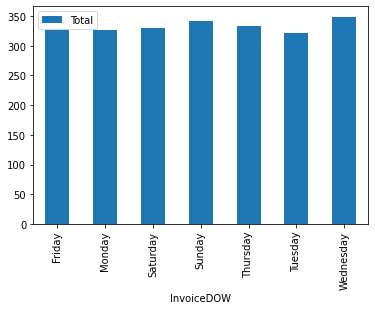

In [121]:
## Your code here
custt.plot.bar()

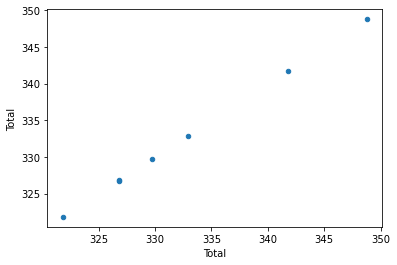

In [132]:
## Your code here
custt.plot.scatter(0,0)

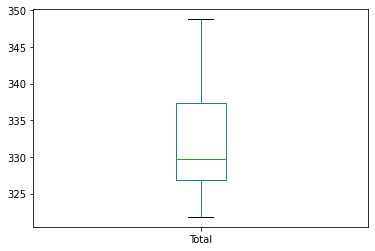

In [125]:
## Your code here
custt.plot.box()

6. Suppose we want to compare the best-selling music genres in the top 5 countries. Let's try by first filling in the blanks (______) in the query below:
```
genre = pd.read_sql_query(
    '''
    SELECT 
    BillingCountry AS Country, ______.Name AS Genre 
    FROM ______ 
    LEFT JOIN invoice_items ON invoices.______ = invoice_items.______
    LEFT JOIN tracks ON invoice_items.______ = ______.______ 
    LEFT JOIN ______ ON tracks.______ = genres.______
    WHERE BillingCountry IN ('USA', 'Canada', 'France', 'Brazil', 'Germany')
    ''',conn)
```


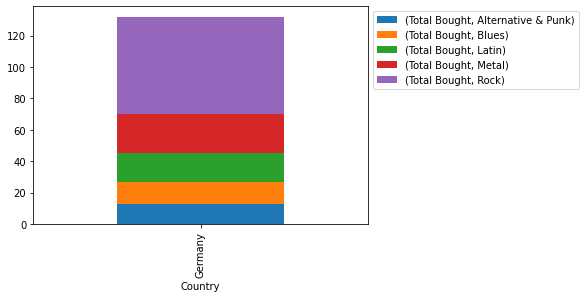

In [80]:
## Your code here
genre = pd.read_sql_query(
 '''
 SELECT 
 BillingCountry AS Country, genres.Name AS Genre 
 FROM invoices 
 LEFT JOIN invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
 LEFT JOIN tracks ON invoice_items.TrackId = tracks.TrackId 
 LEFT JOIN genres ON tracks.GenreId = genres.GenreId
 WHERE BillingCountry IN ('USA', 'Canada', 'France', 'Brazil', 'Germany')
 ''',conn)

genre2 = genre[genre['Country'] == 'Germany']

genre2.\
groupby(['Country','Genre']).size().reset_index(name = 'Total Bought').\
sort_values(['Country','Total Bought'], ascending=False).\
groupby('Country').head(5).\
pivot(index = 'Country', columns = 'Genre').plot(kind='bar',stacked=True).\
legend(bbox_to_anchor=(1, 1), loc=2)


Once you've completed the query for `genre` dataframe above, copy and run the code below to create a bar chart which compares the best-selling song genres per country.
```
genre.\
groupby(['Country','Genre']).size().reset_index(name = 'Total Bought').\
sort_values(['Country','Total Bought'], ascending=False).\
groupby('Country').head(5).\
pivot(index = 'Country', columns = 'Genre').plot(kind='bar',stacked=True).\
legend(bbox_to_anchor=(1, 1), loc=2) 
```
What genre is **not** among the top-selling genre in Germany:
   - [ ] Blues
   - [x] Jazz
   - [ ] Alternative & Punk
   - [ ] Latin